## 导入路透社的数据集

In [1]:
from keras.datasets import reuters
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


加载数据的时候就限定了单词的索引不超过10000，返回的数据就仅包含这10000个单词的了。

In [2]:
len(train_data)

8982

如何解码单词：

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 1. 数据向量化

In [4]:
import numpy as np

# 向量化数据
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 向量化标签
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

由于要分类的最终数据有46个分类，因此中间Dense层16维则太小，修改为64维。

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

softmax：输出各个位置上的概率的激活函数，所有概率之和 = 1

In [6]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



编译了模型，categorical_crossentropy用于评估2个概率之间的差值。

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 1s 157us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================

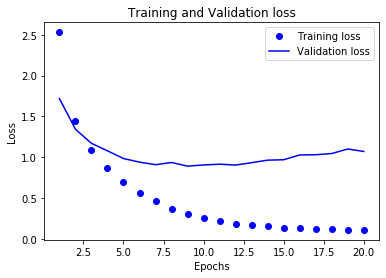

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss ) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

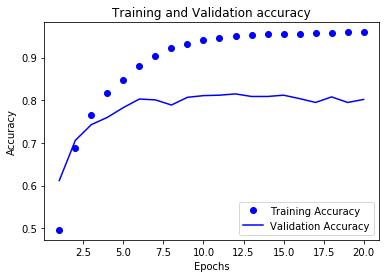

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

从图中可以看出，从第九轮过后开始过拟合了。重新一次9轮的训练：

In [11]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.1054 - acc: 0.9573 - val_loss: 1.1089 - val_acc: 0.7990
Epoch 2/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.1016 - acc: 0.9582 - val_loss: 1.1145 - val_acc: 0.8050
Epoch 3/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.1020 - acc: 0.9585 - val_loss: 1.1015 - val_acc: 0.7950
Epoch 4/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.1025 - acc: 0.9574 - val_loss: 1.1306 - val_acc: 0.7940
Epoch 5/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.0967 - acc: 0.9594 - val_loss: 1.1579 - val_acc: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.0985 - acc: 0.9565 - val_loss: 1.2322 - val_acc: 0.7880
Epoch 7/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.0959 - acc: 0.9573 - val_loss: 1.1845 - val_acc: 0.7950
Epoch 8

In [12]:
results

[1.361384087551521, 0.7827248442204849]

9轮的训练结果，在测试集上得到了76%的精确度，总体上尚可。

* Bones：完全随机的分类算法代码：

In [13]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

完全随机的算法得到的正确率大概是18%。

## 尝试更大或更小的隐藏层

1. 使用 32 个单位的隐藏层：

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 140us/step - loss: 2.7861 - acc: 0.5209 - val_loss: 2.0205 - val_acc: 0.5890
Epoch 2/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.7024 - acc: 0.6580 - val_loss: 1.5509 - val_acc: 0.6710
Epoch 3/20
7982/7982 [==============================] - 1s 105us/step - loss: 1.3286 - acc: 0.7140 - val_loss: 1.3403 - val_acc: 0.7020
Epoch 4/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.1053 - acc: 0.7544 - val_loss: 1.2142 - val_acc: 0.7290
Epoch 5/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.9437 - acc: 0.7915 - val_loss: 1.1570 - val_acc: 0.7350
Epoch 6/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8138 - acc: 0.8177 - val_loss: 1.0716 - val_acc: 0.7590
Epoch 7/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.7029 - acc: 0.8380 - val_loss: 1.0189 - val_acc: 0.7680


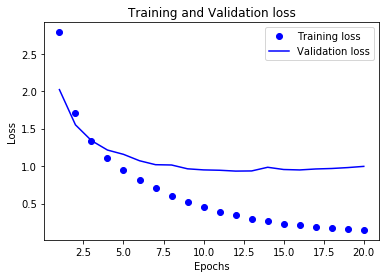

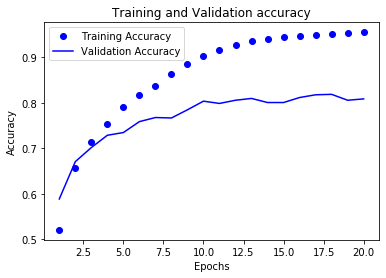

In [15]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss ) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

   训练集准确度95%，但验证集准确度下降到了80%。

2. 使用128个单位的隐藏层：

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.1884 - acc: 0.5611 - val_loss: 1.3841 - val_acc: 0.6940
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.1231 - acc: 0.7498 - val_loss: 1.1268 - val_acc: 0.7460
Epoch 3/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.7945 - acc: 0.8277 - val_loss: 0.9590 - val_acc: 0.7900
Epoch 4/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.5602 - acc: 0.8804 - val_loss: 0.9380 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.4184 - acc: 0.9138 - val_loss: 0.9062 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.3113 - acc: 0.9349 - val_loss: 0.8518 - val_acc: 0.8290
Epoch 7/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.2451 - acc: 0.9426 - val_loss: 0.8646 - val_acc: 0.8270


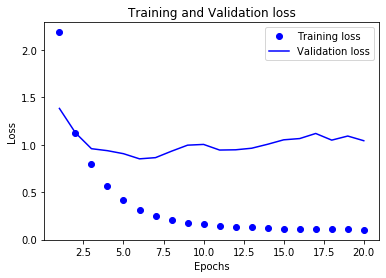

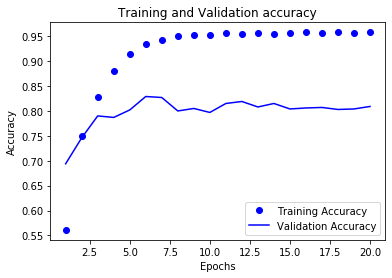

In [16]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss ) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

    训练集准确度仍然95%+，验证集准确度仍然80%。

3. 使用1个隐藏层：

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 161us/step - loss: 2.5030 - acc: 0.5456 - val_loss: 1.7734 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.4394 - acc: 0.7161 - val_loss: 1.3166 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.0482 - acc: 0.7914 - val_loss: 1.1185 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8199 - acc: 0.8341 - val_loss: 1.0074 - val_acc: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.6599 - acc: 0.8666 - val_loss: 0.9346 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.5388 - acc: 0.8923 - val_loss: 0.8868 - val_acc: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.4445 - acc: 0.9100 - val_loss: 0.8645 - val_acc: 0.8210


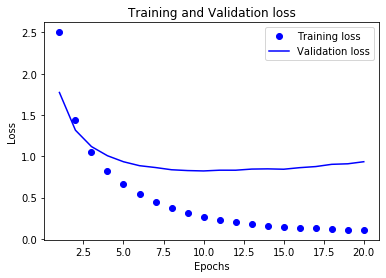

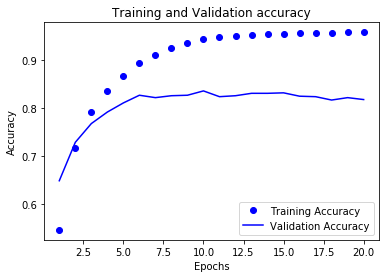

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss ) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

    训练集准确度：95%+，验证集准确度：80%+。

4. 使用3个隐藏层：

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.7221 - acc: 0.5220 - val_loss: 1.6893 - val_acc: 0.6460
Epoch 2/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.3873 - acc: 0.7030 - val_loss: 1.3108 - val_acc: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.0577 - acc: 0.7571 - val_loss: 1.1790 - val_acc: 0.7220
Epoch 4/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.8314 - acc: 0.8107 - val_loss: 1.0538 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.6689 - acc: 0.8540 - val_loss: 1.0624 - val_acc: 0.7720
Epoch 6/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.5235 - acc: 0.8862 - val_loss: 1.0632 - val_acc: 0.7650
Epoch 7/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.4176 - acc: 0.9114 - val_loss: 0.9703 - val_acc: 0.8010
E

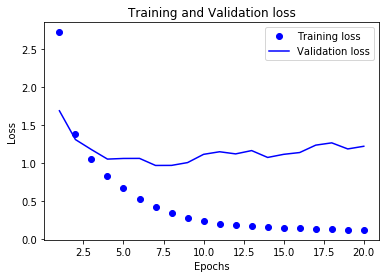

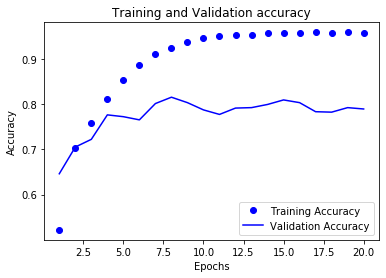

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss ) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

    3个隐藏层的时候，训练集仍然能达到95%准确度，但验证集的准确度反而下降了。